In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

# Class 13: Introduction to Business Cycle Modeling

## Empirical evidence of TFP fluctuation

In [2]:
# Import actual and trend production data
data = pd.read_csv('http://www.briancjenkins.com/teaching/winter2017/econ129/data/Econ129_Rbc_Data.csv',index_col=0)
print(data.head())

                  gdp  gdp_trend  consumption  consumption_trend  investment  \
1948-04-01  19.689528  19.098158    12.575613          12.406745    3.629107   
1948-07-01  19.755762  19.316217    12.524941          12.498225    3.710832   
1948-10-01  19.716226  19.537138    12.509654          12.590485    3.603286   
1949-01-01  19.413778  19.761617    12.477265          12.683657    3.038249   
1949-04-01  19.316470  19.990495    12.697540          12.777826    2.573634   

            investment_trend       hours  hours_trend    capital  \
1948-04-01          3.259243  114.218913   110.913813  20.862738   
1948-07-01          3.287772  114.779083   111.153374  21.061697   
1948-10-01          3.316774  113.349248   111.395497  21.251949   
1949-01-01          3.346734  111.257767   111.644484  21.443147   
1949-04-01          3.378331  109.221296   111.905895  21.487418   

            capital_trend        tfp  tfp_trend  
1948-04-01      20.778246  10.978585  10.869472  
1948-07-01

Recall:

\begin{align}
\frac{X_t - X_t^{trend}}{X_t^{trend}} & \approx \log\left(X_t/X_t^{trend}\right) = \log X_t - \log X_t^{trend}
\end{align}

In [3]:
# Create new DataFrame of percent deviations from trend
data_cycles = pd.DataFrame({
    'gdp':100*(np.log(data.gdp/data.gdp_trend)),
    'consumption':100*(np.log(data.consumption/data.consumption_trend)),
    'investment':100*(np.log(data.investment/data.investment_trend)),
    'hours':100*(np.log(data.hours/data.hours_trend)),
    'capital':100*(np.log(data.capital/data.capital_trend)),
    'tfp':100*(np.log(data.tfp/data.tfp_trend)),
})

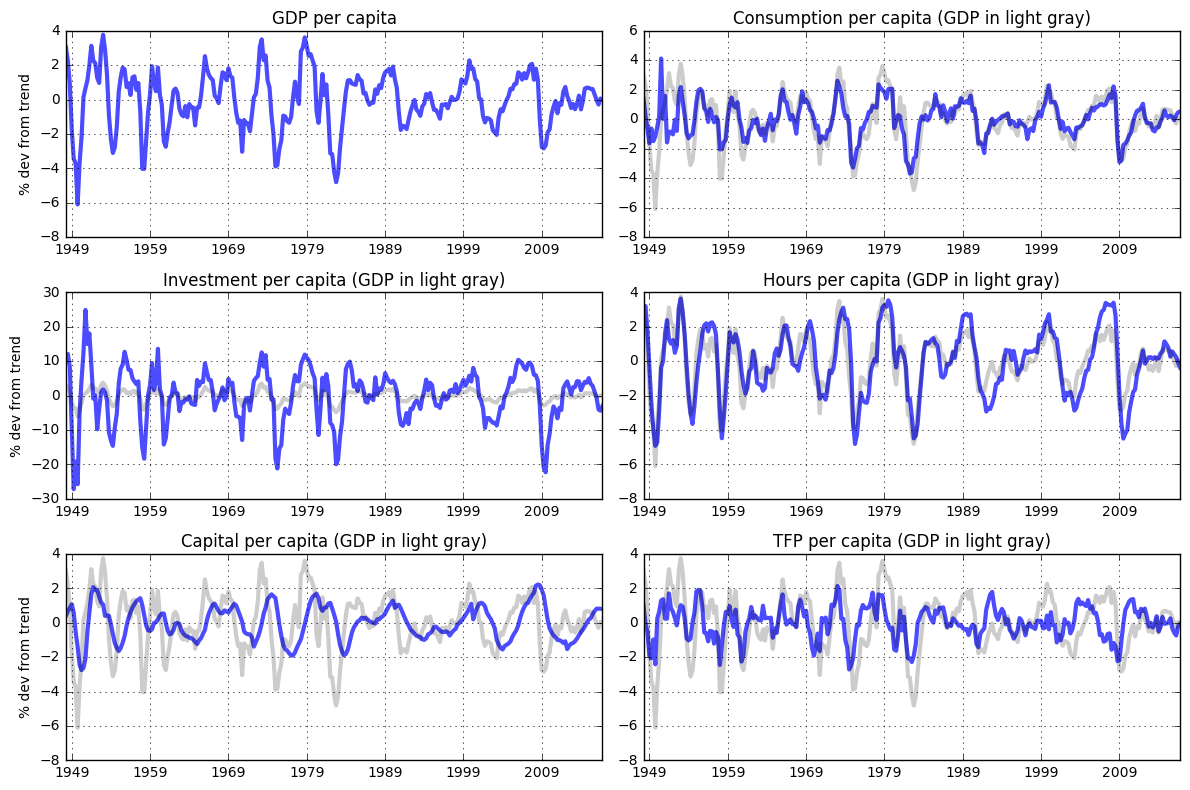

In [12]:
# Plot all percent deviations from trend
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(3,2,1)
ax.plot_date(data_cycles.index,data_cycles['gdp'],'-',lw=3,alpha=0.7)
ax.grid()
ax.set_title('GDP per capita')
ax.set_ylabel('% dev from trend')

ax = fig.add_subplot(3,2,2)
ax.plot_date(data_cycles.index,data_cycles['consumption'],'-',lw=3,alpha=0.7)
ax.plot_date(data_cycles.index,data_cycles['gdp'],'-k',lw=3,alpha=0.2)
ax.grid()
ax.set_title('Consumption per capita (GDP in light gray)')


ax = fig.add_subplot(3,2,3)
ax.plot_date(data_cycles.index,data_cycles['investment'],'-',lw=3,alpha=0.7)
ax.plot_date(data_cycles.index,data_cycles['gdp'],'-k',lw=3,alpha=0.2)
ax.grid()
ax.set_title('Investment per capita (GDP in light gray)')
ax.set_ylabel('% dev from trend')

ax = fig.add_subplot(3,2,4)
ax.plot_date(data_cycles.index,data_cycles['hours'],'-',lw=3,alpha=0.7)
ax.plot_date(data_cycles.index,data_cycles['gdp'],'-k',lw=3,alpha=0.2)
ax.grid()
ax.set_title('Hours per capita (GDP in light gray)')

ax = fig.add_subplot(3,2,5)
ax.plot_date(data_cycles.index,data_cycles['capital'],'-',lw=3,alpha=0.7)
ax.plot_date(data_cycles.index,data_cycles['gdp'],'-k',lw=3,alpha=0.2)
ax.grid()
ax.set_title('Capital per capita (GDP in light gray)')
ax.set_ylabel('% dev from trend')

ax = fig.add_subplot(3,2,6)
ax.plot_date(data_cycles.index,data_cycles['tfp'],'-',lw=3,alpha=0.7,label='TFP')
ax.plot_date(data_cycles.index,data_cycles['gdp'],'-k',lw=3,alpha=0.2,label='GDP')
ax.grid()
ax.set_title('TFP per capita (GDP in light gray)')

plt.tight_layout()

In [5]:
# Add a column of lagged tfp values
data_cycles['tfp_lag']= data_cycles['tfp'].shift()
data_cycles = data_cycles.dropna()
data_cycles.head()

,capital,consumption,gdp,hours,investment,tfp,tfp_lag
1948-07-01,0.665160,0.213536,2.250021,3.209826,12.104587,-0.069172,0.998847
1948-10-01,0.874369,-0.644070,0.912477,1.738684,8.285368,-0.523697,-0.069172
1949-01-01,1.079056,-1.640618,-1.775851,-0.346984,-9.670342,-1.927981,-0.523697
1949-04-01,0.592195,-0.630306,-3.429877,-2.428223,-27.206310,-2.058801,-1.927981
1949-07-01,-0.529607,-1.492416,-3.733884,-3.976193,-19.203487,-0.963995,-2.058801


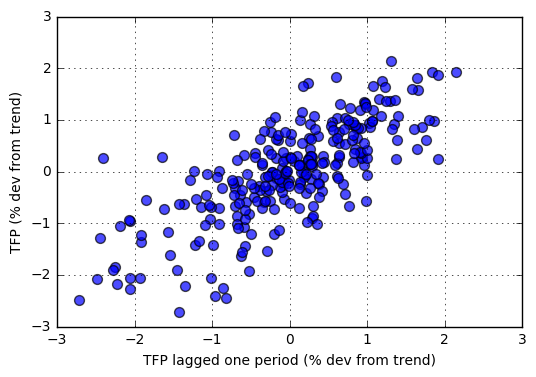

In [6]:
plt.scatter(data_cycles.tfp_lag,data_cycles.tfp,s=50,alpha = 0.7)
plt.grid()
plt.xlabel('TFP lagged one period (% dev from trend)')
plt.ylabel('TFP (% dev from trend)')

Since there appears to be a stong correlation between the lagged cyclical component of TFP and the current cyclical component of TFP, let's estimate the following AR(1) model using the statsmodels package.

\begin{align}
\hat{a}_t & = \rho \hat{a}_{t-1} + \epsilon_t
\end{align}

In [7]:
model = sm.OLS(data_cycles.tfp,data_cycles.tfp_lag)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tfp   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     361.6
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           6.32e-52
Time:                        13:59:47   Log-Likelihood:                -255.51
No. Observations:                 274   AIC:                             513.0
Df Residuals:                     273   BIC:                             516.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
tfp_lag        0.7533      0.040     19.015      0.0

In [8]:
# Store the estimated autoregressive parameter
rhoA = results.params['tfp_lag']

# Compute the predicted values:
tfp_pred = results.predict()

# Compute the standard deviation of the residuals of the regression
sigma = np.std(results.resid)

print('rho:               ',np.round(rhoA,5))
print('sigma (in percent):',np.round(sigma,5))

rho:                0.75329
sigma (in percent): 0.61481


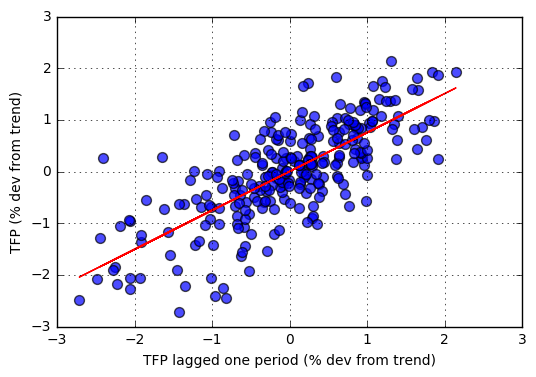

In [10]:
# Scatter plot of data with fitted regression line:
plt.scatter(data_cycles.tfp_lag,data_cycles.tfp,s=50,alpha = 0.7)
plt.plot(data_cycles.tfp_lag,tfp_pred,'r')
plt.grid()
plt.xlabel('TFP lagged one period (% dev from trend)')
plt.ylabel('TFP (% dev from trend)')

## A Baseline Real Business Cycle Model

Consider the following business cycle model:
	\begin{align}
	Y_t & = A_t K_t^{\alpha} \tag{1}\\
	C_t & = (1-s)Y_t \tag{2}\\
	I_t & = K_{t+1} - ( 1- \delta) \tag{3}\\
	Y_t & = C_t + I_t \tag{4}
	\end{align}
where:
	\begin{align}
	\log A_{t+1} & = \rho \log A_t + \epsilon_t, \tag{5}
	\end{align}
reflects exogenous fluctuation in TFP. The endogenous variables in the model are $K_t$, $Y_t$, $C_t$, $I_t$, and $A_t$ and $\epsilon_t$ is an exogenous white noise shock process with standard deviation $\sigma$. $K_t$ and $A_t$ are called *state variables* because their values in period $t$ affect the equilibrium of the model in period $t+1$.

### Non-stochastic steady state
	
1. The *non-stochastic steady state* equilibrium for the model is an equilibrium in which the exogenous shock process $\epsilon_t = 0$ for all $t$ and $K_{t+1} = K_t$ and $A_{t+1} = A_t$ for all $t$. Find the non-stochastic steady state of the model analytically. That is, use pencil and paper to find values for capital $\bar{K}$, output $\bar{Y}$, consumption $\bar{C}$, and investment $\bar{I}$ in terms of the model parameters $\alpha$, $s$, and $\delta$.

2. Suppose that: $\alpha = 0.35$, $\delta = 0.025$, and $s = 0.1$. Use your answers to the previous exercise to compute numerical values for consumption, output, capital, and investment. Use the variable names `kss`, `yss`, `css`, and `iss` to store the computed steady state values.

In [18]:
# Define parameters
s = 0.1
delta = 0.025
alpha = 0.35

# Compute the steady state values of the endogenous variables
kss = (s/delta)**(1/(1-alpha))
yss = kss**alpha
css = (1-s)*yss
iss = yss - css

print('Steady states:\n')
print('capital:    ',round(kss,5))
print('output:     ',round(yss,5))
print('consumption:',round(css,5))
print('investment: ',round(iss,5))

Steady states:

capital:     8.43813
output:      2.10953
consumption: 1.89858
investment:  0.21095


### Impulse responses

In this part, you will simulate the model directly in response to a 1 percent shock to aggregate technology. The simulation will run for $T+1$ periods from $t = 0,\ldots, T$ and the shock arrives at $t = 1$. Suppose that $T = 12$.

1.  Use equations (1) through (4) to solve for $K_{t+1}$, $Y_t$, $C_t$, and $I_t$ in terms of only $K_t$, $a_t$, and the model parameters $\alpha$, $\delta$, and $s$.

2.  Initialize an array for $\epsilon_t$ called `eps_ir` that is equal to a $\times 1$ array of zeros. Set the first element of this array equal to 0.01.

3. Initialize an array for $\log A_t$ called `log_a_ir` that is equal to a $(T+1)\times 1$ array of zeros. Set $\rho = 0.75$ and compute the impulse response of $\log A_t$ to the shock. Use the simulated values for $\log A_t$ to compute $A_t$ and save the values in a variable called `a_ir` (Note: $A_t = e^{\log A_t}$). Plot $\log A_t$ and $A_t$.

4.  Initialize an array for $K_t$ called `k_ir` that is a $(T+1)\times 1$ array of zeros. Set the first value in the array equal to steady state capital. Then compute the subsequent values for $K_t$ using the computed values for $A_t$. Plot $K_t$.

5. Initialize $(T+1)\times 1$ arrays for $Y_t$, $C_t$, and $I_t$ called `y_ir`, `c_ir`, and `i_ir`. Use the computed values for $K_t$ to compute simulated values for $Y_t$, $C_t$, and $I_t$.

6. Construct a $2\times2$ grid of subplots of the impulse responses of capital, output, consumption, and investment to a one percent shock to aggregate technology.

7. Compute the percent deviation of each variable from its steady state 
\begin{align}
100*(\log(X_t) - \log(\bar{X}))
\end{align}
 and store the results in variables called: `k_ir_dev`, `y_ir_dev`, `c_ir_dev`, and `i_ir_dev`. Construct a $2\times2$ grid of subplots of the impulse responses of capital, output, consumption, and investment to the technology shock with each variable expressed as a percent deviation from steady state.

In [22]:
# Set number of simulation periods (minus 1):
T = 12

# Initialize eps_ir as a T x 1 array of zeros and set first value to 0.01
eps_ir = np.zeros(T)
eps_ir[0] = 0.01

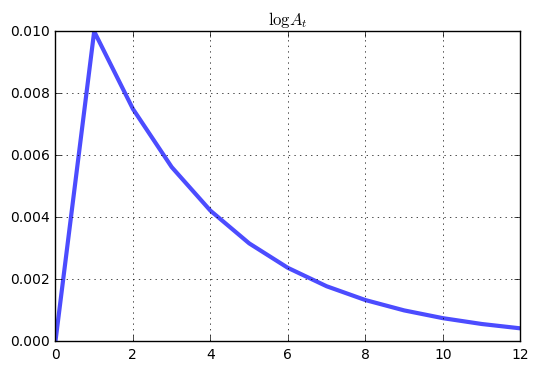

In [24]:
# Set coefficient of autocorrelation for log A
rho = 0.75

# Initialize log_a_ir as a (T+1) x 1 array of zeros and compute.
log_a_ir = np.zeros(T+1)
for t in range(T):
    log_a_ir[t+1] = rho*log_a_ir[t] + eps_ir[t]

# Plot log_a_ir
plt.plot(log_a_ir,lw=3,alpha =0.7)
plt.title('$\log A_t$')
plt.grid()

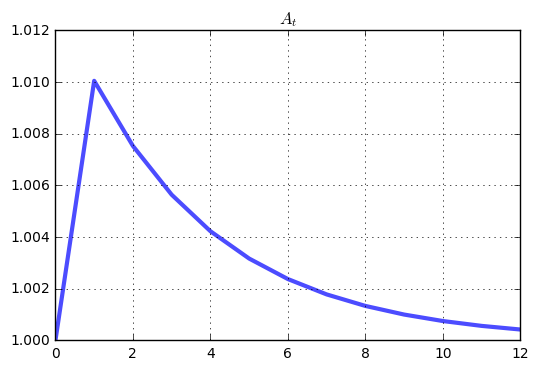

In [27]:
# Computes a_ir.
a_ir = np.exp(log_a_ir)

# Plot a_ir
plt.plot(a_ir,lw=3,alpha =0.7)
plt.title('$A_t$')
plt.grid()

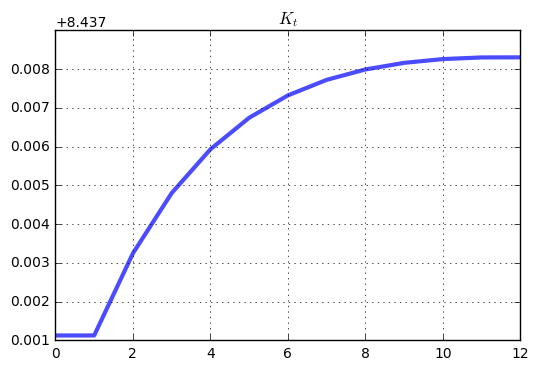

In [28]:
# Initialize k_ir as a (T+1) x 1 array of zeros and compute
k_ir = np.zeros(T+1)
k_ir[0] = kss
for t in range(T):
    k_ir[t+1] = s*a_ir[t] *k_ir[t]**alpha+ (1-delta)*k_ir[t]
    
# Plot k_ir
plt.plot(k_ir,lw=3,alpha =0.7)
plt.title('$K_t$')
plt.grid()

In [30]:
# Compute y_ir, c_ir, i_ir

y_ir = a_ir*k_ir**alpha
c_ir = (1-s)*y_ir
i_ir = s*y_ir

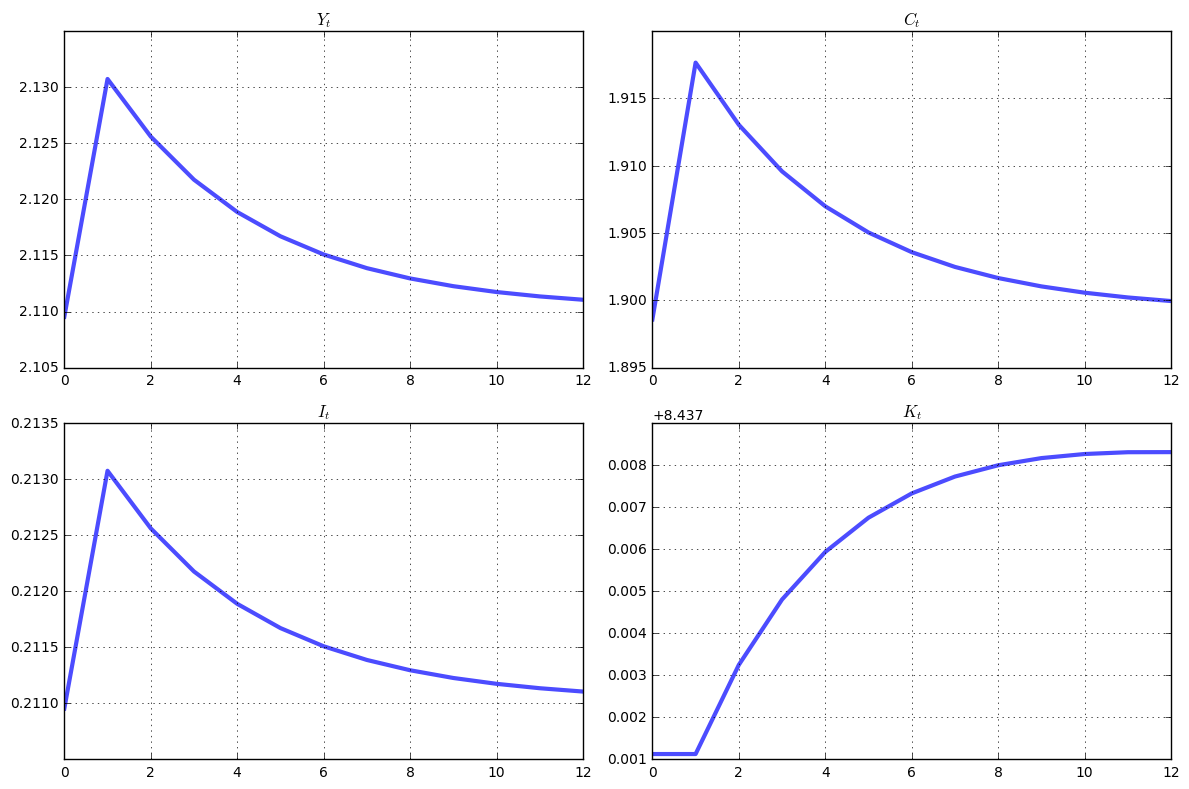

In [35]:
# Create a 2x2 plot of y_ir, c_ir, i_ir, and k_ir
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,2,1)
ax.plot(y_ir,lw=3,alpha = 0.7)
ax.set_title('$Y_t$')
ax.grid()

ax = fig.add_subplot(2,2,2)
ax.plot(c_ir,lw=3,alpha = 0.7)
ax.set_title('$C_t$')
ax.grid()

ax = fig.add_subplot(2,2,3)
ax.plot(i_ir,lw=3,alpha = 0.7)
ax.set_title('$I_t$')
ax.grid()

ax = fig.add_subplot(2,2,4)
ax.plot(k_ir,lw=3,alpha = 0.7)
ax.set_title('$K_t$')
ax.grid()

plt.tight_layout()

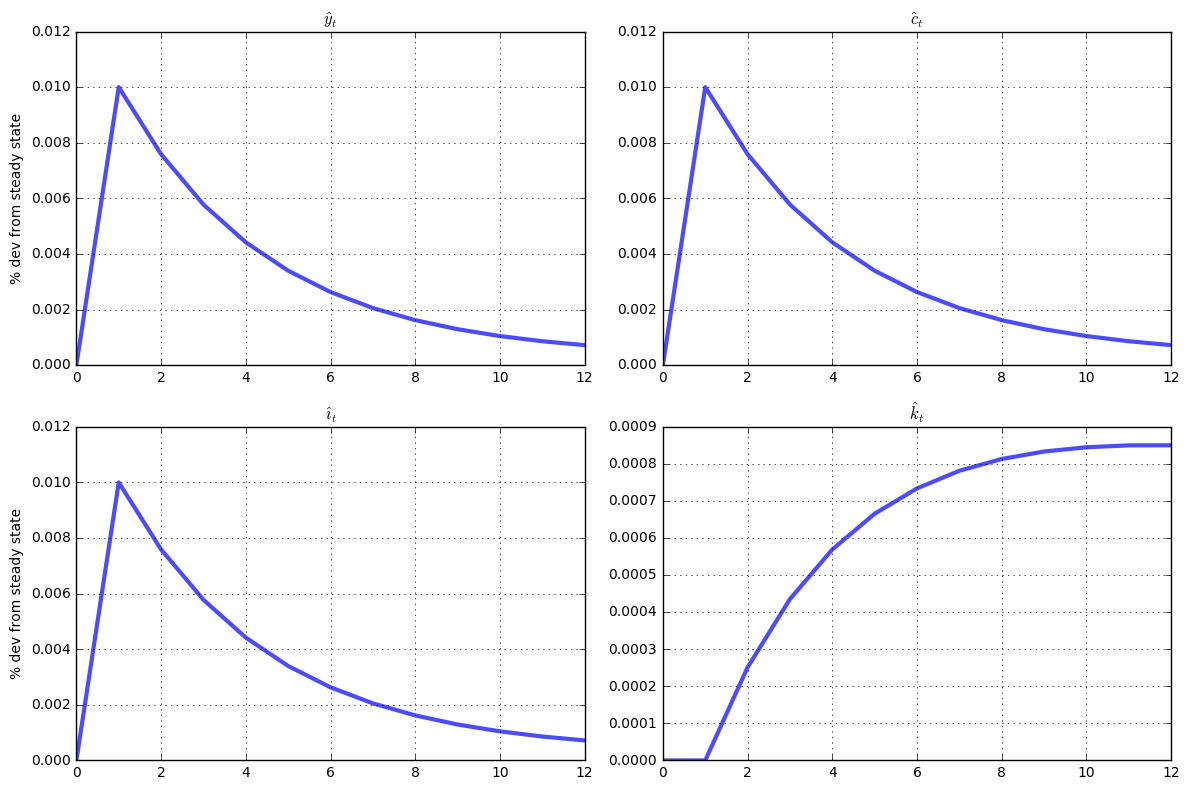

In [44]:
# Compute y_ir_dev, c_ir_dev, i_ir_dev, and k_ir_dev to be the log deviations from steady state of the 
# respective variables

y_ir_dev = np.log(y_ir) - np.log(yss)
c_ir_dev = np.log(c_ir) - np.log(css)
i_ir_dev = np.log(i_ir) - np.log(iss)
k_ir_dev = np.log(k_ir) - np.log(kss)

# Create a 2x2 plot of y_ir_dev, c_ir_dev, i_ir_dev, and k_ir_dev
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,2,1)
ax.plot(y_ir_dev,lw=3,alpha = 0.7)
ax.set_title('$\hat{y}_t$')
ax.grid()
ax.set_ylabel('% dev from steady state')

ax = fig.add_subplot(2,2,2)
ax.plot(c_ir_dev,lw=3,alpha = 0.7)
ax.set_title('$\hat{c}_t$')
ax.grid()

ax = fig.add_subplot(2,2,3)
ax.plot(i_ir_dev,lw=3,alpha = 0.7)
ax.set_title('$\hat{\imath}_t$')
ax.grid()
ax.set_ylabel('% dev from steady state')

ax = fig.add_subplot(2,2,4)
ax.plot(k_ir_dev,lw=3,alpha = 0.7)
ax.set_title('$\hat{k}_t$')
ax.grid()

plt.tight_layout()